In [53]:
from keras.datasets import boston_housing

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import sys
import os

sys.path.append(os.path.abspath(".."))
import utils

In [112]:
# Načti data
(x_train_origin, y_train_origin), (x_test_origin, y_test_origin) = (
    boston_housing.load_data()
)

print(x_train_origin.shape)
print(y_train_origin.shape)

(404, 13)
(404,)


Prepare data


In [113]:
# calc mean and std
mean = x_train_origin.mean(axis=0)
std = x_train_origin.std(axis=0)

#  train data
x_train = x_train_origin - mean
x_train = x_train_origin / std
y_train = y_train_origin

print(x_train.dtype)
print(y_train.dtype)

x_train = pd.DataFrame(x_train)
y_train = pd.Series(y_train)

# test data
x_test = (x_test_origin - mean) / std

x_test = pd.DataFrame(x_test)
y_test = pd.Series(y_test_origin)

float64
float64


# Cross Validation


processing fold # 0
- 🧠 Spouštím trénování...
✅ Fold 1 done
   📉 val_mae: 4.16 USD
   📉 val_mse: 44.68 USD
processing fold # 1
- 🧠 Spouštím trénování...
✅ Fold 2 done
   📉 val_mae: 3.70 USD
   📉 val_mse: 32.87 USD
processing fold # 2
- 🧠 Spouštím trénování...
✅ Fold 3 done
   📉 val_mae: 18.48 USD
   📉 val_mse: 439.25 USD

🎯 Final MAE scores per fold:
   Fold 1: 4.16 USD
   Fold 2: 3.70 USD
   Fold 3: 18.48 USD

🕒 Total training time: 13.97 s


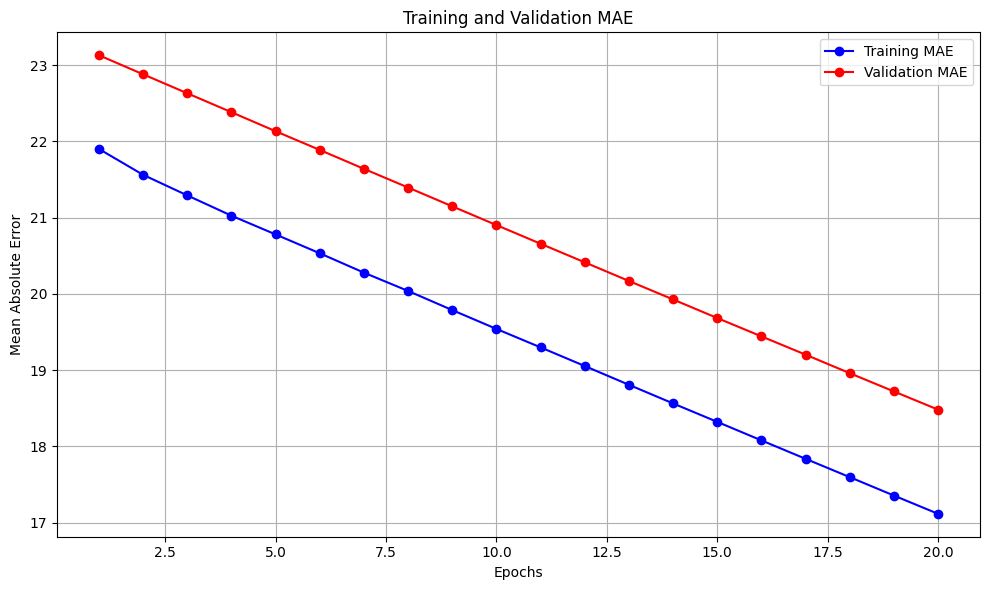

In [98]:
import keras
import time

start = time.time()


def build_model(input_dim):
    model = keras.models.Sequential(
        [
            keras.layers.Input(shape=(input_dim,)),
            keras.layers.Dense(16, activation="relu"),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(4, activation="relu"),
            keras.layers.Dense(1),  # Regresní výstup
        ]
    )
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model


k = 3
num_val_samples = len(x_train) // k
num_epochs = 20
all_scores = []
all_histories = []
input_shape = x_train.shape[1]

for i in range(k):
    print(f"processing fold # {i}")
    val_data = x_train[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples : (i + 1) * num_val_samples]

    partial_train_data = pd.concat(
        [x_train[: i * num_val_samples], x_train[(i + 1) * num_val_samples :]]
    )
    partial_train_targets = pd.concat(
        [y_train[: i * num_val_samples], y_train[(i + 1) * num_val_samples :]]
    )

    model = build_model(input_shape)
    print("- 🧠 Spouštím trénování...")
    history = model.fit(
        partial_train_data,
        partial_train_targets,
        epochs=num_epochs,
        batch_size=1,
        validation_data=(val_data, val_targets),
        verbose=0,
    )

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    print(f"✅ Fold {i + 1} done")
    print(f"   📉 val_mae: {val_mae:,.2f} USD")
    print(f"   📉 val_mse: {val_mse:,.2f} USD")

    all_scores.append(val_mae)
    all_histories.append(history)

print("\n🎯 Final MAE scores per fold:")
for i, score in enumerate(all_scores, 1):
    print(f"   Fold {i}: {score:,.2f} USD")

print(f"\n🕒 Total training time: {time.time() - start:.2f} s")
_ = utils.plot_history(history.history, metric="mae")

# use all data


- 🧠 Spouštím trénování...
✅ Fold 2 done
   📉 val_mae: 2.53 USD
   📉 val_mse: 23.16 USD

🎯 Final MAE scores per fold:
   Fold 1: 2.53 USD

🕒 Total training time: 4.96 s


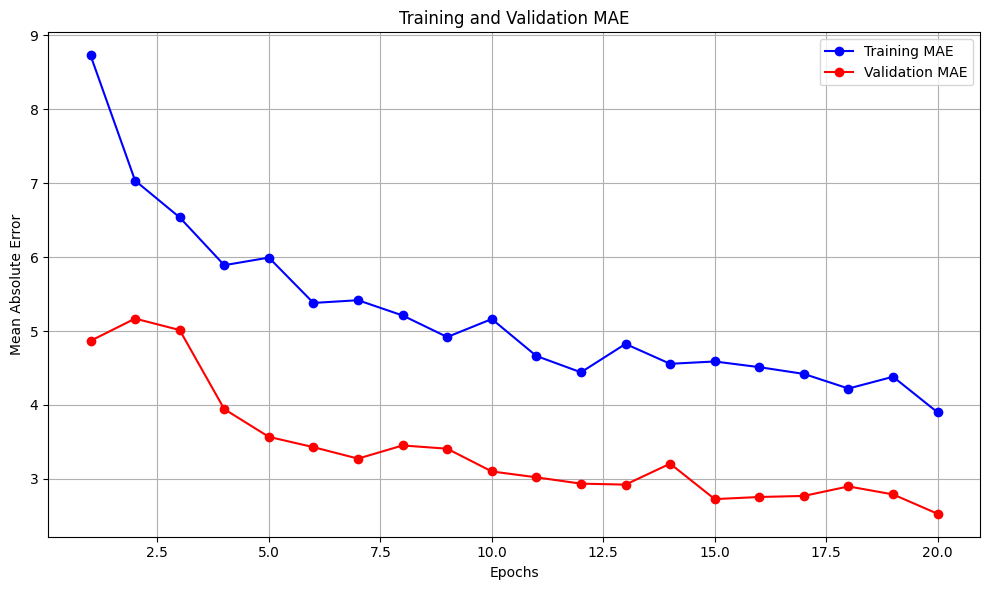

In [115]:
import keras
import time

start = time.time()


def build_model(input_dim):
    model = keras.models.Sequential(
        [
            keras.layers.Input(shape=(input_dim,)),
            keras.layers.Dense(32, activation="relu"),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(16, activation="relu"),
            keras.layers.Dense(1),  # Regresní výstup
        ]
    )
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model


num_epochs = 20
all_scores = []
all_histories = []
input_shape = x_train.shape[1]

# Split data
test_size = int(x_train.shape[0] / 5)

train_data = x_train[test_size:]
train_targets = y_train[test_size:]

val_data = x_train[:test_size]
val_targets = y_train[:test_size]

# random split data
# from sklearn.model_selection import train_test_split

# train_data, val_data, train_targets, val_targets = train_test_split(
#     x_train, y_train, test_size=0.2, random_state=42
# )

model = build_model(input_shape)
print("- 🧠 Spouštím trénování...")
history = model.fit(
    train_data,
    train_targets,
    epochs=num_epochs,
    batch_size=1,
    validation_data=(val_data, val_targets),
    verbose=0,
)

val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
print(f"✅ Fold {i + 1} done")
print(f"   📉 val_mae: {val_mae:,.2f} USD")
print(f"   📉 val_mse: {val_mse:,.2f} USD")

all_scores.append(val_mae)
all_histories.append(history)

print("\n🎯 Final MAE scores per fold:")
for i, score in enumerate(all_scores, 1):
    print(f"   Fold {i}: {score:,.2f} USD")

print(f"\n🕒 Total training time: {time.time() - start:.2f} s")
_ = utils.plot_history(history.history, metric="mae")

C:\Users\Uzivatel\AppData\Local\Temp\ipykernel_36464\840741304.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Uzivatel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


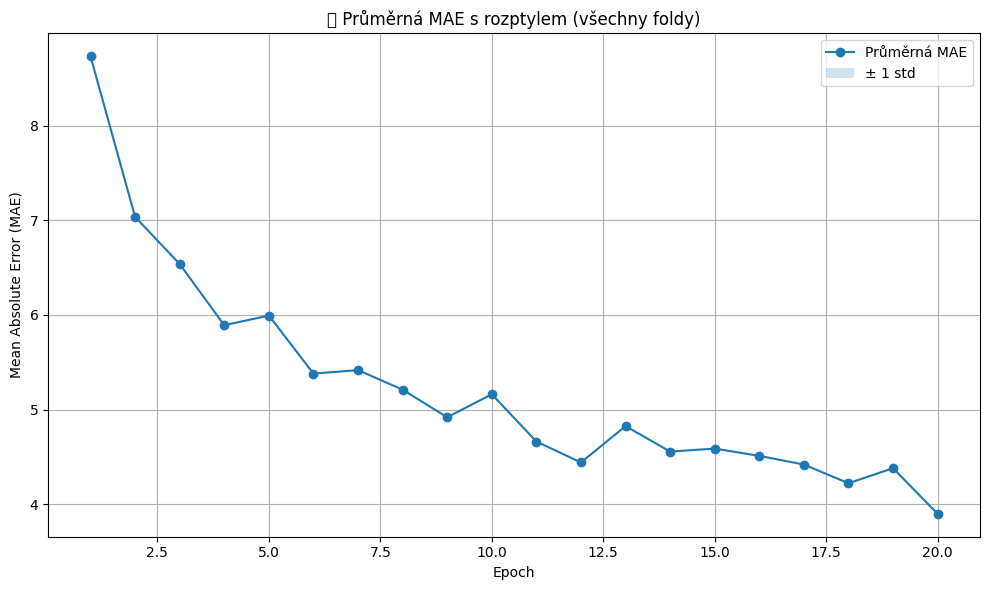

In [117]:
epoch_maes = [
    [history.history["mae"][epoch] for history in all_histories]
    for epoch in range(num_epochs)
]
average_mae_history = [np.mean(epoch) for epoch in epoch_maes]
std_mae_history = [np.std(epoch) for epoch in epoch_maes]

plt.figure(figsize=(10, 6))
plt.plot(
    range(1, num_epochs + 1), average_mae_history, marker="o", label="Průměrná MAE"
)
plt.fill_between(
    range(1, num_epochs + 1),
    np.array(average_mae_history) - np.array(std_mae_history),
    np.array(average_mae_history) + np.array(std_mae_history),
    alpha=0.2,
    label="± 1 std",
)
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("📈 Průměrná MAE s rozptylem (všechny foldy)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# test model on target data


### test on TEST data


5.6
50.0
23.07843137254902
min_diff = -2.15 USD | 
max_diff = 27.16 USD | 


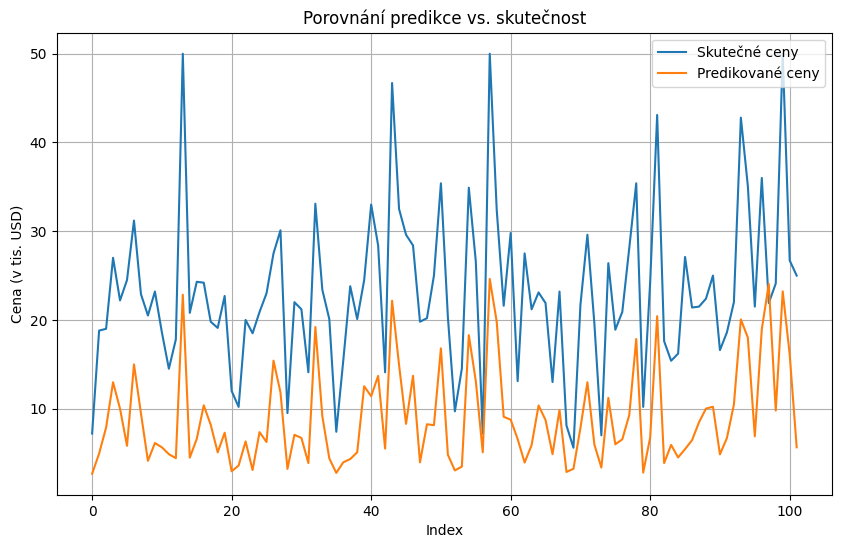

In [120]:
print(y_test_origin.min())
print(y_test_origin.max())
print(y_test_origin.mean())
max = 0
min = 0
count = 20
count = x_test.shape[0]

for i in range(count):
    target = x_test.iloc[i].values.reshape(1, -1)
    predictions = model.predict(target, verbose=0)
    target_value = y_test[i]

    diff = round(target_value - predictions[0][0], 2)
    pred = round(predictions[0][0], 2)
    target = round(target_value, 2)

    if diff > max:
        max = diff
    elif diff < min:
        min = diff

    # print(
    #     f"diff = {format(diff, ',').replace(',', ' ')} USD | "
    #     f"prediction = {format(pred, ',').replace(',', ' ')} USD | "
    #     f"target = {format(target, ',').replace(',', ' ')} USD"
    # )
print(
    f"min_diff = {format(min, ',').replace(',', ' ')} USD | \n"
    f"max_diff = {format(max, ',').replace(',', ' ')} USD | "
)

preds = [
    model.predict(x_test.iloc[i].values.reshape(1, -1), verbose=0)[0][0]
    for i in range(count)
]
trues = y_test[:count]

plt.figure(figsize=(10, 6))
plt.plot(trues.values, label="Skutečné ceny")
plt.plot(preds, label="Predikované ceny")
plt.title("Porovnání predikce vs. skutečnost")
plt.xlabel("Index")
plt.ylabel("Cena (v tis. USD)")
plt.legend()
plt.grid(True)
plt.show()

### test on TRAIN data


In [121]:
print(y_train_origin.min())
print(y_train_origin.max())
print(y_train_origin.mean())
max = 0
min = 0
count = 20

for i in range(count):
    target = x_train.iloc[i].values.reshape(1, -1)
    predictions = model.predict(target, verbose=0)
    target_value = y_train[i]

    diff = round(target_value - predictions[0][0], 2)
    pred = round(predictions[0][0], 2)
    target = round(target_value, 2)

    if diff > max:
        max = diff
    elif diff < min:
        min = diff

    print(
        f"diff = {format(diff, ',').replace(',', ' ')} USD | "
        f"prediction = {format(pred, ',').replace(',', ' ')} USD | "
        f"target = {format(target, ',').replace(',', ' ')} USD"
    )
print(
    f"min_diff = {format(min, ',').replace(',', ' ')} USD | \n"
    f"max_diff = {format(max, ',').replace(',', ' ')} USD | "
)

preds = [
    model.predict(x_train.iloc[i].values.reshape(1, -1), verbose=0)[0][0]
    for i in range(count)
]
trues = y_train[:count]

plt.figure(figsize=(10, 6))
plt.plot(trues.values, label="Skutečné ceny")
plt.plot(preds, label="Predikované ceny")
plt.title("Porovnání predikce vs. skutečnost")
plt.xlabel("Index")
plt.ylabel("Cena (v tis. USD)")
plt.legend()
plt.grid(True)
plt.show()

5.0
50.0
22.395049504950492
diff = 11.03 USD | prediction = 4.170000076293945 USD | target = 15.2 USD
diff = 20.22 USD | prediction = 22.079999923706055 USD | target = 42.3 USD
diff = 42.23 USD | prediction = 7.769999980926514 USD | target = 50.0 USD
diff = 12.69 USD | prediction = 8.40999984741211 USD | target = 21.1 USD
diff = 10.87 USD | prediction = 6.829999923706055 USD | target = 17.7 USD
diff = 13.87 USD | prediction = 4.630000114440918 USD | target = 18.5 USD
diff = 7.56 USD | prediction = 3.740000009536743 USD | target = 11.3 USD
diff = 11.94 USD | prediction = 3.6600000858306885 USD | target = 15.6 USD
diff = 11.56 USD | prediction = 4.039999961853027 USD | target = 15.6 USD
diff = 11.74 USD | prediction = 2.6600000858306885 USD | target = 14.4 USD
diff = 6.89 USD | prediction = 5.210000038146973 USD | target = 12.1 USD
diff = 15.81 USD | prediction = 2.0899999141693115 USD | target = 17.9 USD
diff = 17.77 USD | prediction = 5.329999923706055 USD | target = 23.1 USD
diff = 13

In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices("GPU")))

diff = 10.38 USD | prediction = 4.820000171661377 USD | target = 15.2 USD
diff = 25.9 USD | prediction = 16.399999618530273 USD | target = 42.3 USD
diff = 42.05 USD | prediction = 7.949999809265137 USD | target = 50.0 USD
diff = 14.78 USD | prediction = 6.320000171661377 USD | target = 21.1 USD
diff = 12.0 USD | prediction = 5.699999809265137 USD | target = 17.7 USD
diff = 13.23 USD | prediction = 5.269999980926514 USD | target = 18.5 USD
diff = 5.53 USD | prediction = 5.769999980926514 USD | target = 11.3 USD
diff = 9.99 USD | prediction = 5.610000133514404 USD | target = 15.6 USD
diff = 10.71 USD | prediction = 4.889999866485596 USD | target = 15.6 USD
diff = 8.3 USD | prediction = 6.099999904632568 USD | target = 14.4 USD


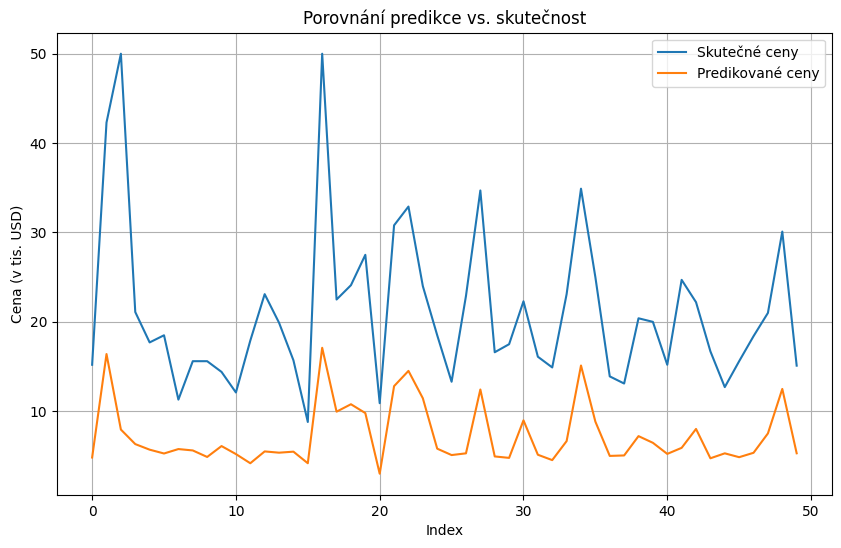

In [68]:
for i in range(10):
    target = x_test.iloc[i].values.reshape(1, -1)
    predictions = final_model.predict(target, verbose=0)  # ✅ tady!
    target_value = y_test[i]

    diff = round(target_value - predictions[0][0], 2)
    pred = round(predictions[0][0], 2)
    target = round(target_value, 2)

    if diff > max:
        max = diff
    elif diff < min:
        min = diff

    print(
        f"diff = {format(diff, ',').replace(',', ' ')} USD | "
        f"prediction = {format(pred, ',').replace(',', ' ')} USD | "
        f"target = {format(target, ',').replace(',', ' ')} USD"
    )

import matplotlib.pyplot as plt

preds = [
    final_model.predict(x_test.iloc[i].values.reshape(1, -1), verbose=0)[0][0]
    for i in range(50)
]
trues = y_test[:50]

plt.figure(figsize=(10, 6))
plt.plot(trues.values, label="Skutečné ceny")
plt.plot(preds, label="Predikované ceny")
plt.title("Porovnání predikce vs. skutečnost")
plt.xlabel("Index")
plt.ylabel("Cena (v tis. USD)")
plt.legend()
plt.grid(True)
plt.show()

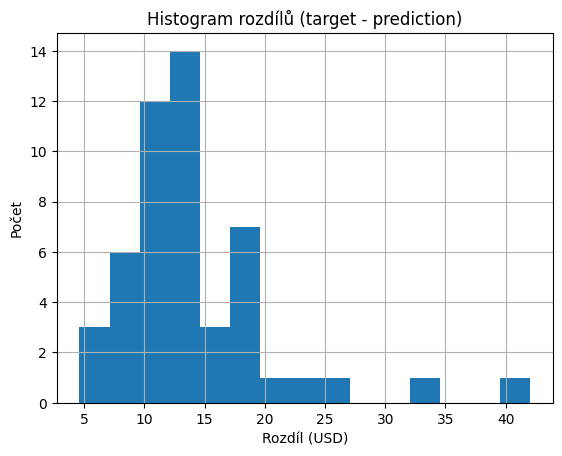

In [69]:
diffs = [y_test.iloc[i] - preds[i] for i in range(50)]
plt.hist(diffs, bins=15)
plt.title("Histogram rozdílů (target - prediction)")
plt.xlabel("Rozdíl (USD)")
plt.ylabel("Počet")
plt.grid(True)
plt.show()